In [1]:
import matplotlib.pyplot as plt
import numpy as np

from snn_dpe import Encoder

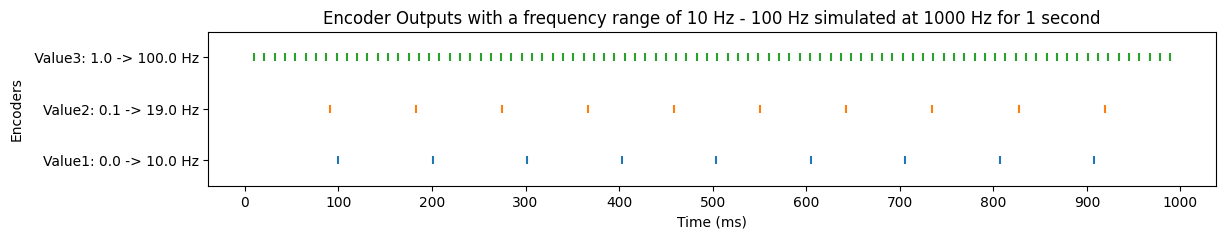

In [2]:
min_f = 10
max_f = 100
sim_f = 1000

value1 = 0.0
value2 = 0.1
value3 = 1.0

e1 = Encoder(min_f, max_f, sim_f) 
e2 = Encoder(min_f, max_f, sim_f)
e3 = Encoder(min_f, max_f, sim_f)

e1.set_value(value1)
e2.set_value(value2)
e3.set_value(value3)

# simulate for one second
fires1 = []
fires2 = []
fires3 = []
for t in range(sim_f):
    if e1.update():
        fires1.append(t)

    if e2.update():
        fires2.append(t)

    if e3.update():
        fires3.append(t)

fig = plt.subplots(figsize=(13,2))
plt.title(f'Encoder Outputs with a frequency range of {min_f} Hz - {max_f} Hz simulated at {sim_f} Hz for 1 second')
e_labels=[f'Value1: {value1} -> {e1.value_f} Hz',f'Value2: {value2} -> {e2.value_f} Hz',f' Value3: {value3} -> {e3.value_f} Hz']
plt.yticks(ticks=[1, 2, 3], labels=e_labels)
plt.ylabel('Encoders')
plt.ylim(0.5, 3.5)
plt.xlabel('Time (ms)')

plt.xticks(ticks=range(0, sim_f + 1, 100))

plt.scatter(fires1, np.ones(len(fires1)) * 1, marker='|')
plt.scatter(fires2, np.ones(len(fires2)) * 2, marker='|')
plt.scatter(fires3, np.ones(len(fires3)) * 3, marker='|')
# plt.savefig('../Images/Example_enc.pdf')
plt.show()

## Period vs. Frequency encoding

100.0
32.0


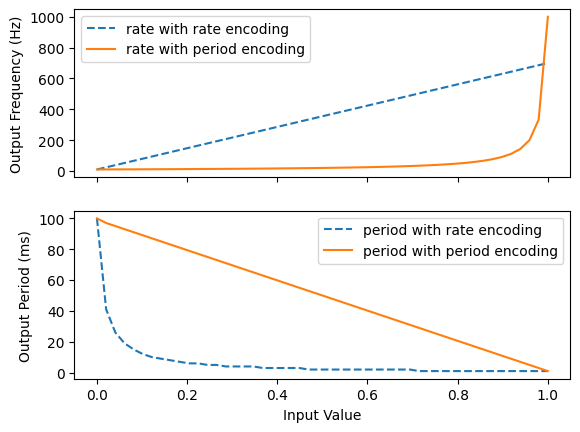

In [3]:
x = np.linspace(0, 1)

min_f = 10
max_f = 700
sim_f = 1000
y = ((max_f - min_f) * x) + min_f

fig, ax = plt.subplots(2,1, sharex=True)

# max_period = min(sim_f/min_f, max_f)
# min_period = max(sim_f/min_f, min_f)
y_scaled = -(((sim_f/min_f - sim_f/max_f) * x) + sim_f/max_f) + (sim_f/min_f + sim_f/max_f)
y_scaled = np.asarray(y_scaled, np.int32)
period = np.asarray(sim_f / y,  np.int32)
period_corrected = np.asarray(np.linspace(sim_f/min_f, sim_f/max_f),  np.int32)
period_enc_freq = sim_f / y_scaled
actual_freq = sim_f / period
# plt.plot(x, -1/np.log(x)/50)
ax[0].plot(x, y, label='rate with rate encoding', linestyle='dashed')
ax[1].plot(x, period, label='period with rate encoding', linestyle='dashed')
# plt.plot(x, period_corrected, label = 'period corrected')
ax[1].plot(x, y_scaled, label = 'period with period encoding')
# ax[0].plot(x, actual_freq, label = 'actual rate encoded', linestyle='dashed')


ax[0].plot(x, period_enc_freq, label = 'rate with period encoding')

# plt.ylim(0, 300*1.1)
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel('Input Value')
ax[0].set_ylabel('Output Frequency (Hz)')
ax[1].set_ylabel('Output Period (ms)')

print((len(np.unique(y_scaled))/len(y_scaled)) * 100)
# print(period_corrected == y_scaled)

print((len(np.unique(actual_freq))/len(actual_freq)) * 100)